# Obdelava podatkov

In [1]:
import pandas as pd

knjige = pd.read_csv('edited_data/books.csv', index_col='title')
avtorji = pd.read_csv('edited_data/authors.csv', index_col='title')
serije = pd.read_csv('edited_data/series.csv', index_col='title')

pd.options.display.max_rows = 20

In [2]:
knjige.sort_values(['avg_rating', 'ratings'], ascending=[False, False])

,shelved,avg_rating,ratings,published
title,,,,
Words of Radiance,6739,4.77,146480,2014
Harry Potter Series Box Set,2986,4.74,222926,2015
A Court of Mist and Fury,7802,4.69,205563,2016
Kingdom of Ash,2201,4.66,42509,2018
The Way of Kings,11263,4.65,214984,2010
Oathbringer,3523,4.64,65804,2017
Assassin's Fate,1239,4.64,19413,2017
Harry Potter and the Deathly Hallows,41262,4.63,2086286,2007
Crooked Kingdom,6342,4.62,102030,2016


In [3]:
knjige.sort_values('ratings', ascending=False)

,shelved,avg_rating,ratings,published
title,,,,
Harry Potter and the Sorcerer's Stone,52267,4.46,5650277,1997
The Hunger Games,11716,4.33,5549516,2008
Twilight,15676,3.58,4301192,2005
Divergent,5561,4.22,2512928,2011
The Hobbit,45190,4.26,2440677,1937
Animal Farm,2509,3.91,2256005,1945
Harry Potter and the Prisoner of Azkaban,43770,4.55,2239869,1999
Harry Potter and the Chamber of Secrets,43972,4.40,2187768,1998
Catching Fire,9338,4.29,2139812,2009


In [4]:
avtorji

,author
title,
Harry Potter and the Sorcerer's Stone,J.K. Rowling
The Hobbit,J.R.R. Tolkien
Harry Potter and the Chamber of Secrets,J.K. Rowling
Harry Potter and the Prisoner of Azkaban,J.K. Rowling
Harry Potter and the Goblet of Fire,J.K. Rowling
Harry Potter and the Deathly Hallows,J.K. Rowling
Harry Potter and the Half-Blood Prince,J.K. Rowling
Harry Potter and the Order of the Phoenix,J.K. Rowling
A Game of Thrones,George R.R. Martin


In [5]:
serije

,series,volume
title,,
Harry Potter and the Sorcerer's Stone,Harry Potter,1
Harry Potter and the Chamber of Secrets,Harry Potter,2
Harry Potter and the Prisoner of Azkaban,Harry Potter,3
Harry Potter and the Goblet of Fire,Harry Potter,4
Harry Potter and the Deathly Hallows,Harry Potter,7
Harry Potter and the Half-Blood Prince,Harry Potter,6
Harry Potter and the Order of the Phoenix,Harry Potter,5
A Game of Thrones,A Song of Ice and Fire,1
The Fellowship of the Ring,The Lord of the Rings,1


In [6]:
knjige[(knjige.ratings >= 500000)].sort_values('avg_rating', ascending=False)

,shelved,avg_rating,ratings,published
title,,,,
Harry Potter and the Deathly Hallows,41262,4.63,2086286,2007
The Name of the Wind,24191,4.55,557994,2007
Harry Potter and the Prisoner of Azkaban,43770,4.55,2239869,1999
Harry Potter and the Half-Blood Prince,41044,4.55,2008442,2005
A Storm of Swords,24017,4.54,579838,2000
Harry Potter and the Goblet of Fire,42447,4.54,2097963,2000
The Return of the King,23980,4.52,565851,1955
The Last Olympian,10034,4.50,557465,2009
Harry Potter and the Order of the Phoenix,41007,4.48,2058067,2003


In [7]:
knjige_po_letih = knjige.groupby('published')

In [8]:
knjige_po_letih

In [9]:
knjige_po_letih.avg_rating.mean(), knjige_po_letih.shelved.mean()

(published
 -720     3.740000
  975     3.430000
  1595    3.940000
  1726    3.560000
  1812    4.310000
  1818    3.770000
  1835    4.280000
  1843    4.040000
  1865    4.015000
  1871    4.040000
            ...   
  2009    4.000167
  2010    4.044333
  2011    4.116375
  2012    4.087206
  2013    4.165319
  2014    4.113103
  2015    4.076833
  2016    4.116724
  2017    4.170286
  2018    4.122632
 Name: avg_rating, Length: 89, dtype: float64, published
 -720     1494.000000
  975     1348.000000
  1595    1563.000000
  1726    1842.000000
  1812    1708.000000
  1818    1841.000000
  1835    1092.000000
  1843    1378.000000
  1865    2693.000000
  1871    1863.000000
             ...     
  2009    2563.566667
  2010    2435.916667
  2011    3072.362500
  2012    2507.985294
  2013    2636.340426
  2014    2648.310345
  2015    2838.900000
  2016    2390.379310
  2017    2218.457143
  2018    2255.526316
 Name: shelved, Length: 89, dtype: float64)

In [10]:
knjige['decade'] = 10 * (knjige.published // 10)

In [11]:
knjige

,shelved,avg_rating,ratings,published,decade
title,,,,,
Harry Potter and the Sorcerer's Stone,52267,4.46,5650277,1997,1990
The Hobbit,45190,4.26,2440677,1937,1930
Harry Potter and the Chamber of Secrets,43972,4.40,2187768,1998,1990
Harry Potter and the Prisoner of Azkaban,43770,4.55,2239869,1999,1990
Harry Potter and the Goblet of Fire,42447,4.54,2097963,2000,2000
Harry Potter and the Deathly Hallows,41262,4.63,2086286,2007,2000
Harry Potter and the Half-Blood Prince,41044,4.55,2008442,2005,2000
Harry Potter and the Order of the Phoenix,41007,4.48,2058067,2003,2000
A Game of Thrones,39676,4.45,1673135,1996,1990


In [12]:
knjige_po_desetletjih = knjige.groupby('decade')

In [13]:
knjige_po_desetletjih.mean()

,shelved,avg_rating,ratings,published
decade,,,,
-720,1494.000000,3.740000,7.704590e+05,-720.000000
970,1348.000000,3.430000,2.007280e+05,975.000000
1590,1563.000000,3.940000,3.963870e+05,1595.000000
1720,1842.000000,3.560000,2.047510e+05,1726.000000
1810,1774.500000,4.040000,5.590340e+05,1815.000000
1830,1092.000000,4.280000,1.149660e+05,1835.000000
1840,1378.000000,4.040000,5.130460e+05,1843.000000
1860,2693.000000,4.015000,2.500800e+05,1865.000000
1870,2995.000000,4.036667,1.738493e+05,1871.666667


In [14]:
knjige_po_desetletjih.size()

decade
-720       1
 970       1
 1590      1
 1720      1
 1810      2
 1830      1
 1840      1
 1860      2
 1870      3
 1890      2
        ... 
 1920      1
 1930      2
 1940      3
 1950     17
 1960     19
 1970     39
 1980    106
 1990    177
 2000    377
 2010    485
Length: 22, dtype: int64

In [15]:
%matplotlib inline

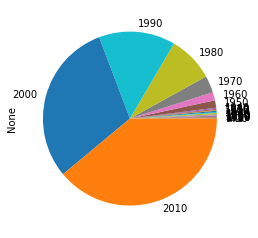

In [16]:
knjige.groupby('decade').size().plot.pie()

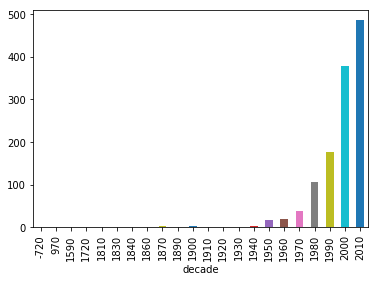

In [17]:
knjige.groupby('decade').size().plot.bar(x='decade', y=None)

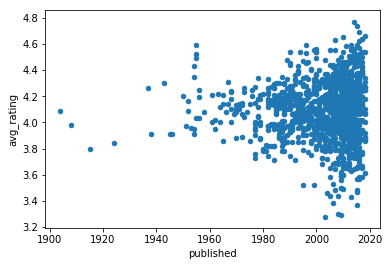

In [18]:
knjige[knjige.published > 1900].plot.scatter('published', 'avg_rating')

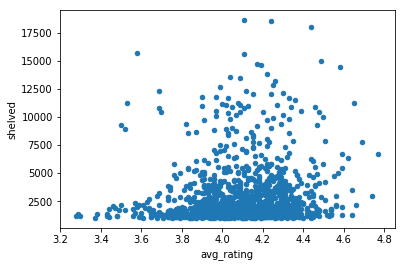

In [19]:
knjige[knjige.shelved < 20000].plot.scatter('avg_rating', 'shelved')

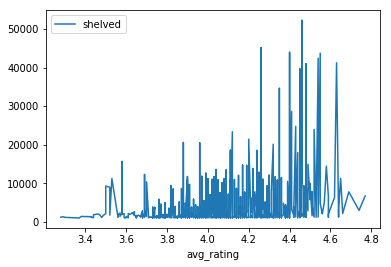

In [20]:
knjige.sort_values('avg_rating').plot('avg_rating', 'shelved')

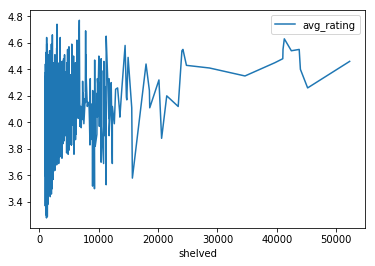

In [35]:
knjige.sort_values('shelved').plot('shelved', 'avg_rating')

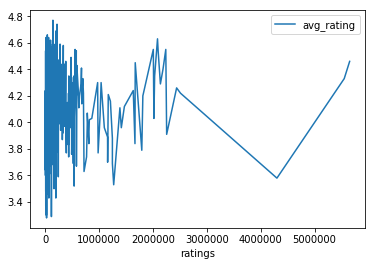

In [42]:
knjige.sort_values('ratings').plot('ratings', 'avg_rating')

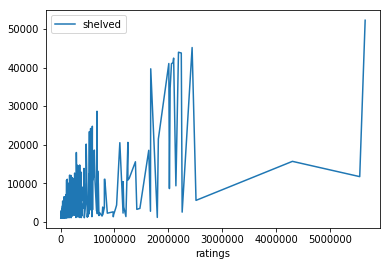

In [37]:
knjige.sort_values('ratings').plot('ratings', 'shelved')

In [21]:
pd.merge(knjige, avtorji, left_index=True, right_index=True).sort_values(['published', 'avg_rating'], ascending=[False, False])

,shelved,avg_rating,ratings,published,decade,author
title,,,,,,
Kingdom of Ash,2201,4.66,42509,2018,2010,Sarah J. Maas
Muse of Nightmares,1344,4.54,10971,2018,2010,Laini Taylor
Circe,2975,4.34,62223,2018,2010,Madeline Miller
Spinning Silver,3264,4.31,22363,2018,2010,Naomi Novik
A Reaper at the Gates,1344,4.27,17583,2018,2010,Sabaa Tahir
Legendary,1125,4.27,19562,2018,2010,Stephanie Garber
Children of Blood and Bone,4673,4.25,57179,2018,2010,Tomi Adeyemi
Children of Blood and Bone,4673,4.25,57179,2018,2010,Tomi Adeyemi
Children of Blood and Bone,4667,4.25,57179,2018,2010,Tomi Adeyemi


In [22]:
knjige.loc['Alice in Wonderland']

shelved         2806.00
avg_rating         4.03
ratings       355198.00
published       1865.00
decade          1860.00
Name: Alice in Wonderland, dtype: float64

In [23]:
celotna_tabela = pd.merge(pd.merge(knjige, avtorji, left_index=True, right_index=True), serije, left_index=True, right_index=True)

In [24]:
celotna_tabela.sort_values(['published', 'avg_rating'], ascending=[False, False])

,shelved,avg_rating,ratings,published,decade,author,series,volume
title,,,,,,,,
Kingdom of Ash,2201,4.66,42509,2018,2010,Sarah J. Maas,Throne of Glass,7
Muse of Nightmares,1344,4.54,10971,2018,2010,Laini Taylor,Strange the Dreamer,2
A Reaper at the Gates,1344,4.27,17583,2018,2010,Sabaa Tahir,An Ember in the Ashes,3
Legendary,1125,4.27,19562,2018,2010,Stephanie Garber,Caraval,2
Children of Blood and Bone,4673,4.25,57179,2018,2010,Tomi Adeyemi,Legacy of Orïsha,1
Children of Blood and Bone,4673,4.25,57179,2018,2010,Tomi Adeyemi,Legacy of Orïsha,1
Children of Blood and Bone,4673,4.25,57179,2018,2010,Tomi Adeyemi,Legacy of Orïsha,1
Children of Blood and Bone,4673,4.25,57179,2018,2010,Tomi Adeyemi,Legacy of Orïsha,1
Children of Blood and Bone,4667,4.25,57179,2018,2010,Tomi Adeyemi,Legacy of Orïsha,1


In [25]:
celotna_tabela.groupby('series').size()

series
A Court of Thorns and Roses        3
A Land Fit for Heroes              1
A Series of Unfortunate Events     1
A Song of Ice and Fire             5
A Thousand Nights                  1
Abhorsen                           3
Abraham Lincoln: Vampire Hunter    1
Age of the Five                    1
Air Awakens                        1
Akata Witch                        1
                                  ..
Wintersong                         1
Witches                            5
Witches,                           1
Wizard,                            1
Women of the Otherworld            1
World of the Five Gods             3
Wraith Kings                       1
Xanth                              4
Young Wizards                      1
the End of Days,                   3
Length: 473, dtype: int64

In [26]:
celotna_tabela.groupby('series').size().sort_values()

series
Rise of the Empress            1
The Passage                    1
The Poppy War                  1
Pegasus                        1
Passenger                      1
The Prince of Nothing          1
Paranormalcy                   1
The Orphan's Tales             1
Oz                             1
Of Fire and Stars              1
                              ..
Harry Potter                   8
Malazan Book of the Fallen     9
The Sandman                   10
Sword of Truth                10
House of Night                10
Legend of Drizzt,             13
Sookie Stackhouse             13
The Dresden Files             14
Wheel of Time                 14
Discworld                     34
Length: 473, dtype: int64

In [27]:
celotna_tabela.groupby('series').mean()

,shelved,avg_rating,ratings,published,decade
series,,,,,
A Court of Thorns and Roses,8211.000000,4.486667,213001.666667,2016.000000,2010.000000
A Land Fit for Heroes,1581.000000,3.730000,13217.000000,2008.000000,2000.000000
A Series of Unfortunate Events,1891.000000,3.920000,333047.000000,1999.000000,1990.000000
A Song of Ice and Fire,27180.200000,4.368000,788135.000000,2002.000000,1998.000000
A Thousand Nights,1352.000000,3.650000,11119.000000,2015.000000,2010.000000
Abhorsen,3886.333333,4.133333,68521.666667,2006.333333,2003.333333
Abraham Lincoln: Vampire Hunter,1370.000000,3.700000,123153.000000,2010.000000,2010.000000
Age of the Five,1312.000000,3.860000,13959.000000,2005.000000,2000.000000
Air Awakens,1524.000000,4.010000,16726.000000,2015.000000,2010.000000


In [31]:
celotna_tabela.groupby('series').mean().sort_values('avg_rating', ascending=False)

,shelved,avg_rating,ratings,published,decade
series,,,,,
The Stormlight Archive,7175.000000,4.686667,142422.666667,2013.666667,2010.000000
The Fitz and the Fool,1239.000000,4.640000,19413.000000,2017.000000,2010.000000
The Kingkiller Chronicle,19320.500000,4.565000,448512.000000,2009.000000,2005.000000
Six of Crows,8606.500000,4.540000,137474.500000,2015.500000,2010.000000
The Fitz and The Fool,1591.000000,4.510000,23692.000000,2015.000000,2010.000000
The Dark Artifices,1512.000000,4.495000,91028.500000,2016.500000,2010.000000
Throne of Glass,6819.428571,4.492857,180834.571429,2015.000000,2010.000000
A Court of Thorns and Roses,8211.000000,4.486667,213001.666667,2016.000000,2010.000000
The Infernal Devices,6712.333333,4.456667,411831.666667,2011.333333,2010.000000


In [34]:
celotna_tabela.groupby('author').mean().sort_values('avg_rating', ascending=False)

,shelved,avg_rating,ratings,published,decade
author,,,,,
Patrick Rothfuss,19320.500000,4.565000,4.485120e+05,2009.000000,2005.000000
Sarah J. Maas,7236.900000,4.491000,1.904847e+05,2015.300000,2010.000000
J.K. Rowling,34225.555556,4.446667,2.041090e+06,2004.555556,1998.888889
Brian K. Vaughan,1957.600000,4.442000,8.322860e+04,2013.600000,2010.000000
Neil Gaiman,2921.818182,4.423636,8.947027e+04,1992.727273,1989.090909
Jessica Townsend,1041.000000,4.400000,1.241600e+04,2017.000000,2010.000000
George R.R. Martin,27180.200000,4.368000,7.881350e+05,2002.000000,1998.000000
Neal Shusterman,1073.000000,4.360000,5.243000e+04,2016.000000,2010.000000
Nicholas Eames,1387.000000,4.360000,1.148500e+04,2017.000000,2010.000000
